# Laboratory work #5 Decision Tree

In this work your goal is to get yourself familiar with Decision Tree Classifier. 

You can collaborate with your teammate to complete this laboratory work - in a team of 2 students.

## Task 1 Introduction
1. Create a team of two students and choose a dataset suitable for classification task. You can use www.kaggle.com or any similar resources of datasets. 
2. Describe you dataset - what kind of information does it contain, what are the features, what is the target value?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Breast_cancer_data.csv')

In [3]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [4]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


## Task 2 Data preprocessing

Perform preprocessing on your data - get rid of NANs, outliers and corrupted data, encode categorical data and perform scaling if necessary.

In [52]:
x, y = df.drop("diagnosis", axis=1), df.diagnosis.values

In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [54]:
st_sc=StandardScaler()

In [55]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [56]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [57]:
x_sc=st_sc.fit_transform(x)

In [58]:
plt.plot(x[:,0])

TypeError: '(slice(None, None, None), 0)' is an invalid key

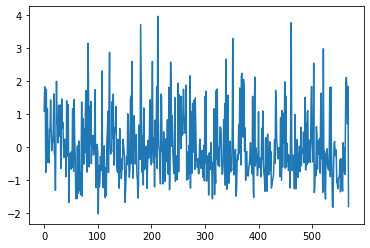

In [59]:
plt.plot(x_sc[:,0])

In [60]:
x_sc.shape

(569, 5)

In [61]:
y.shape

(569,)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((398, 5), (171, 5), (398,), (171,))

## Task 3 Decision Tree

Train DecisionTreeClassifier() model on your data, initialize max_depth as 3, visualize predicted values, and evaluate the performance. Show confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dtc = DecisionTreeClassifier(random_state=42,max_depth=3)

In [66]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [67]:
y_preds_dtc = dtc.predict(x_test)

In [68]:
y_preds_dtc

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [69]:
dtc.score(x_test, y_test)

0.9005847953216374

In [70]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_test, y_preds_dtc)
c_m

array([[ 51,  13],
       [  4, 103]], dtype=int64)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds_dtc)

0.9005847953216374

In [72]:
from sklearn.metrics import recall_score
recall_score(y_test, y_preds_dtc)

0.9626168224299065

In [73]:
from sklearn.metrics import precision_score
precision_score(y_test, y_preds_dtc)

0.8879310344827587

In [74]:
from sklearn.metrics import f1_score
f1_score(y_test, y_preds_dtc)

0.9237668161434978

[Text(892.8, 380.52, 'X[3] <= 696.25\ngini = 0.467\nsamples = 398\nvalue = [148, 250]'),
 Text(446.4, 271.8, 'X[2] <= 85.885\ngini = 0.216\nsamples = 276\nvalue = [34, 242]'),
 Text(223.2, 163.07999999999998, 'X[4] <= 0.14\ngini = 0.079\nsamples = 193\nvalue = [8, 185]'),
 Text(111.6, 54.360000000000014, 'gini = 0.07\nsamples = 192\nvalue = [7, 185]'),
 Text(334.79999999999995, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(669.5999999999999, 163.07999999999998, 'X[4] <= 0.101\ngini = 0.43\nsamples = 83\nvalue = [26, 57]'),
 Text(558.0, 54.360000000000014, 'gini = 0.226\nsamples = 54\nvalue = [7, 47]'),
 Text(781.1999999999999, 54.360000000000014, 'gini = 0.452\nsamples = 29\nvalue = [19, 10]'),
 Text(1339.1999999999998, 271.8, 'X[1] <= 16.11\ngini = 0.123\nsamples = 122\nvalue = [114, 8]'),
 Text(1116.0, 163.07999999999998, 'X[2] <= 116.3\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(1004.4, 54.360000000000014, 'gini = 0.375\nsamples = 8\nvalue = [2, 6]')

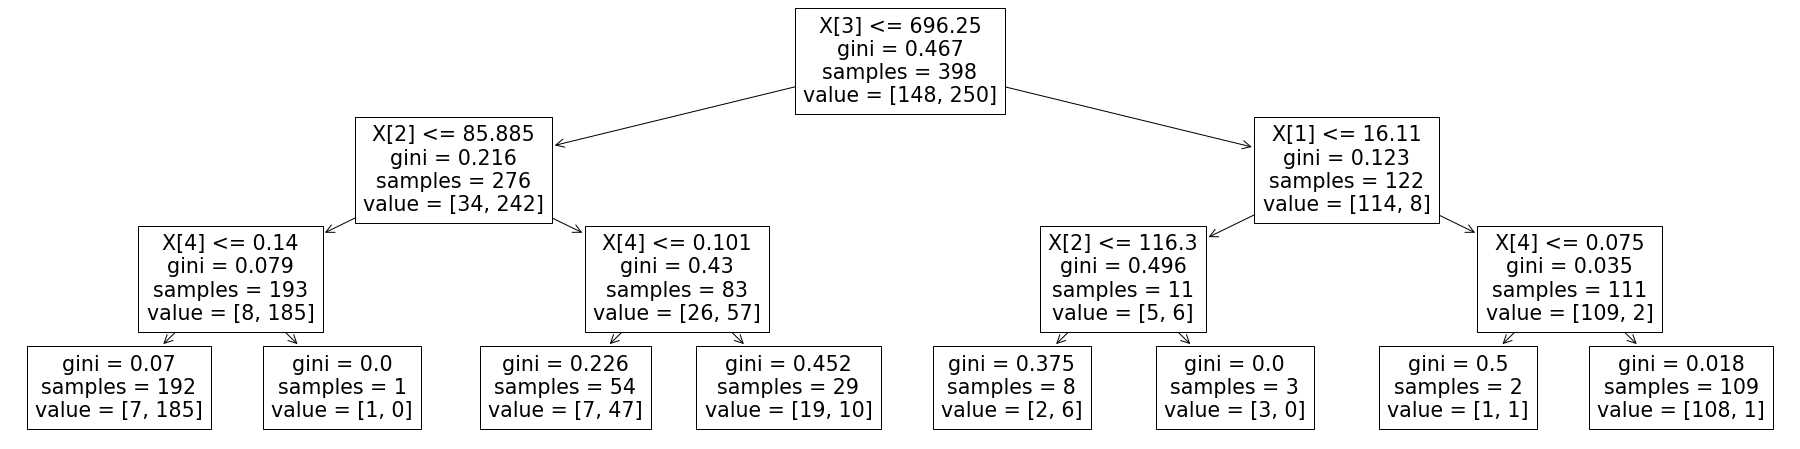

In [75]:
from sklearn import tree
plt.figure(figsize=(32,8))  
tree.plot_tree(dtc)

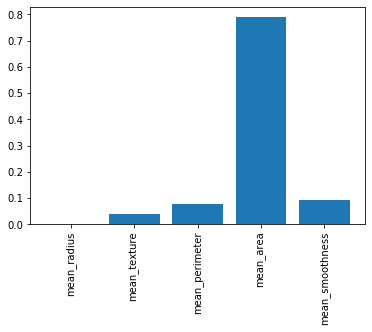

mean_texture : 0.039444322197497876
mean_perimeter : 0.07813359854041979
mean_area : 0.788806500283035
mean_smoothness : 0.09361557897904736


In [78]:
feat_imp = dtc.feature_importances_
plt.bar([x for x in x_train.columns], feat_imp)
plt.xticks(rotation=90)
plt.show()

for i in range(len(feat_imp)):
    if feat_imp[i] > 0.01:
        print(x_train.columns[i],':',feat_imp[i])

## Task 4 ROC AUC

Show ROC curve and calculate AUC. Evaluate model using $ROC-AUC$ — Area Under Curve. This curve represents a line from $(0,0)$ to $(1,1)$ in $True Positive Rate (TPR)$ and $False Positive Rate (FPR)$: 
- True Positive Rate: $$TPR = \frac{TP}{TP + FN}$$

- False Positive Rate: $$FPR = \frac{FP}{FP + TN}$$



In [79]:
from sklearn.metrics import roc_auc_score, roc_curve

Text(0, 0.5, 'True Positive Rate')

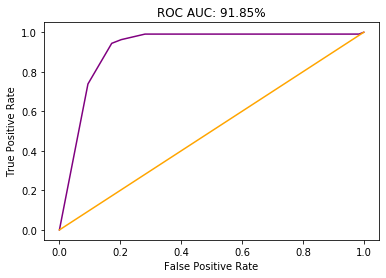

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, dtc.predict_proba(x_test)[:,1])
auc_score = roc_auc_score(y_test, dtc.predict_proba(x_test)[:,1])
plt.title('ROC AUC: {:.2f}%'.format(auc_score*100))

plt.plot(fpr, tpr, color='purple')
plt.plot([0, 1], [0, 1],color='orange')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

dtc_auc = roc_auc_score(y_test, y_preds_dtc)
dtc_auc

In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_preds_dtc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='DECISION TREE CLASSIFICATION')

## Task 5 Decision Tree using GridSearchCV

Train DecisionTreeClassifier() model on your data, tune the hyperparameters of an estimator using GridSearchCV, visualize predicted values, and evaluate the performance. Show confusion_matrix, accuracy_score, recall_score, precision_score, f1_score. 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

In [85]:
from sklearn.model_selection import GridSearchCV

param = {'max_depth': list(range(1,10)),'min_samples_leaf': list(range(1,10))}
dtc_gs = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(dtc_gs, param)

In [86]:
grid.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
          

In [106]:
dtc.score(x_train, y_train), dtc.score(x_test, y_test)

(0.9296482412060302, 0.9005847953216374)

In [109]:
y_preds_dtc_gs = grid.predict(x_test)
y_preds_dtc_gs

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [110]:
best_max_depth = grid.best_estimator_.max_depth
print ("Best max depth: ", best_max_depth)

best_min_sam = grid.best_estimator_.min_samples_leaf
print("Best min samples leaf: ", best_min_sam)

Best max depth:  5
Best min samples leaf:  4


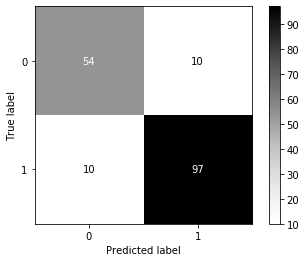

In [111]:
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

plot_confusion_matrix(grid, x_test, y_test, cmap='Greys',values_format='d')

In [112]:
print(metrics.classification_report(y_test,y_preds_dtc_gs))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        64
           1       0.91      0.91      0.91       107

    accuracy                           0.88       171
   macro avg       0.88      0.88      0.88       171
weighted avg       0.88      0.88      0.88       171



## Task 6 ROC AUC

Show ROC curve and calculate AUC for model from task 5.

Text(0, 0.5, 'True Positive Rate')

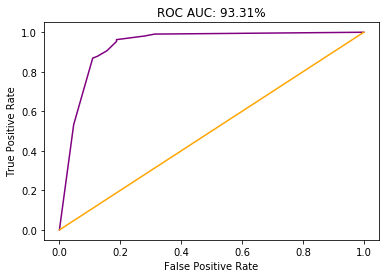

In [113]:
fpr, tpr, thresholds = roc_curve(y_test, grid.predict_proba(x_test)[:,1])
auc_score = roc_auc_score(y_test, grid.predict_proba(x_test)[:,1])
# print('ROC AUC: {:.2f}%'.format(auc_score*100))
plt.title('ROC AUC: {:.2f}%'.format(auc_score*100))

plt.plot(fpr, tpr, color='purple')
plt.plot([0, 1], [0, 1],color='orange')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Task 7 Conclusion

Now, as you have calculated main metrics for 2 models - analyze them and make a conclusion which model performs better and why.

In [119]:
print('DecitionTree\n')
print(metrics.classification_report(y_test,y_preds_dtc))
print('DecitionTree with GridSearchCV\n')
print(metrics.classification_report(y_test,y_preds_dtc_gs))

DecitionTree

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        64
           1       0.89      0.96      0.92       107

    accuracy                           0.90       171
   macro avg       0.91      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171

DecitionTree with GridSearchCV

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        64
           1       0.91      0.91      0.91       107

    accuracy                           0.88       171
   macro avg       0.88      0.88      0.88       171
weighted avg       0.88      0.88      0.88       171



DT using GridSearch is less accurate. Accuracy differs by 2%, and we got 91.85% AUC for DecitionTree and 93.31% for DecitionTree with GridSearchCV.